## Based on discussion of the "Callan Periodic Table of Investment Returns" on Bogleheads.org

Discussion: https://www.bogleheads.org/forum/viewtopic.php?f=10&t=336650

Background and data source: https://www.bogleheads.org/wiki/Callan_periodic_table_of_investment_returns

Callan Institute: https://www.callan.com/periodic-table/

### Import and initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

%matplotlib inline

# reset styling defaults
plt.style.use('default')

# update with custom styling
plt.style.use('./images/callan.mplstyle')

### Read data

In [2]:
df_returns = pd.read_csv('./callan_returns.csv', index_col='Year')
df_hyp_gro = pd.read_csv('./callan_hyp_growth.csv', index_col='Year')
df_cagr = pd.read_csv('./callan_cagr.csv', index_col='Year')

### Setup

In [3]:
# set RGB colors for plotting. Colors selected to match Callan table.
colors = {
    'US Fixed Income': (.41, .60, .41),
    'High Yield': (.85, .66, .26),
    'Large Cap Equity': (.08, .40, .59),
    'Global ex-US Fixed Income': (.58, .79, .57),
    'Real Estate': (.15, .60, .60),
    'Small Cap Equity': (.56, .66, .74),
    'Cash Equivalent': (.38, .61, .98),
    'Dev ex-US Equity': (.60, .60, .49),
    'Emerging Market Equity': (.96, .59, .21)
}

In [4]:
# abbreviations
abbrevs = {
    'US Fixed Income': 'US FI',
    'High Yield': 'Hi Yld',
    'Large Cap Equity': 'US LC',
    'Global ex-US Fixed Income': 'Intl FI',
    'Real Estate': 'Real Est',
    'Small Cap Equity': 'Small Cap',
    'Cash Equivalent': 'Cash',
    'Dev ex-US Equity': 'Intl Dev',
    'Emerging Market Equity': 'Intl Emg'
}

In [5]:
# subset returns with only Callan classes
df_cal_ret = df_returns.loc[:,'US Fixed Income':'Emerging Market Equity']

In [6]:
# create legend to be re-used in plots
legend = []
for c in df_cal_ret.columns:
    legend.append(mpatches.Patch(color=colors[c], label=c))
    
# set x-axis limit reference for all plots
x_min = df_cal_ret.index.min() - 1
x_max = df_cal_ret.index.max() + 1

# helper function to draw horizontal line to emphasize y=0
def zeroline():
    plt.axhline(0, color='black', lw=1.2, zorder=0)
    
# helper function to draw the shaded rectangles
def draw_box(year, pct, height, facecolor, edgecolor, linewidth=1, alpha=1.0, z_order = 1):
    '''helper function to create matplotlib rectangle'''
    # set lower left corner
    x = year - 0.5
    y = pct - (height / 2)
    
    # set width (dx) and height (dy) of rectangle
    dx = 1
    dy = height
    
    # create rectangle and add to plot
    rect = mpatches.Rectangle((x,y), dx, dy, facecolor=facecolor, edgecolor=edgecolor, linewidth=linewidth, alpha=alpha, zorder = z_order)
    ax.add_patch(rect)

***

## Asset class performance by year

In [7]:
# plot settings

# toggle mini-lines
# set to True to display lines connecting rectangles of same asset class
# set to False to omit lines
mini_lines = False

# mini line weight. Value of 0.5 is good starting point
mini_line_weight = 0.5

#toggle min/max labels
min_max = False

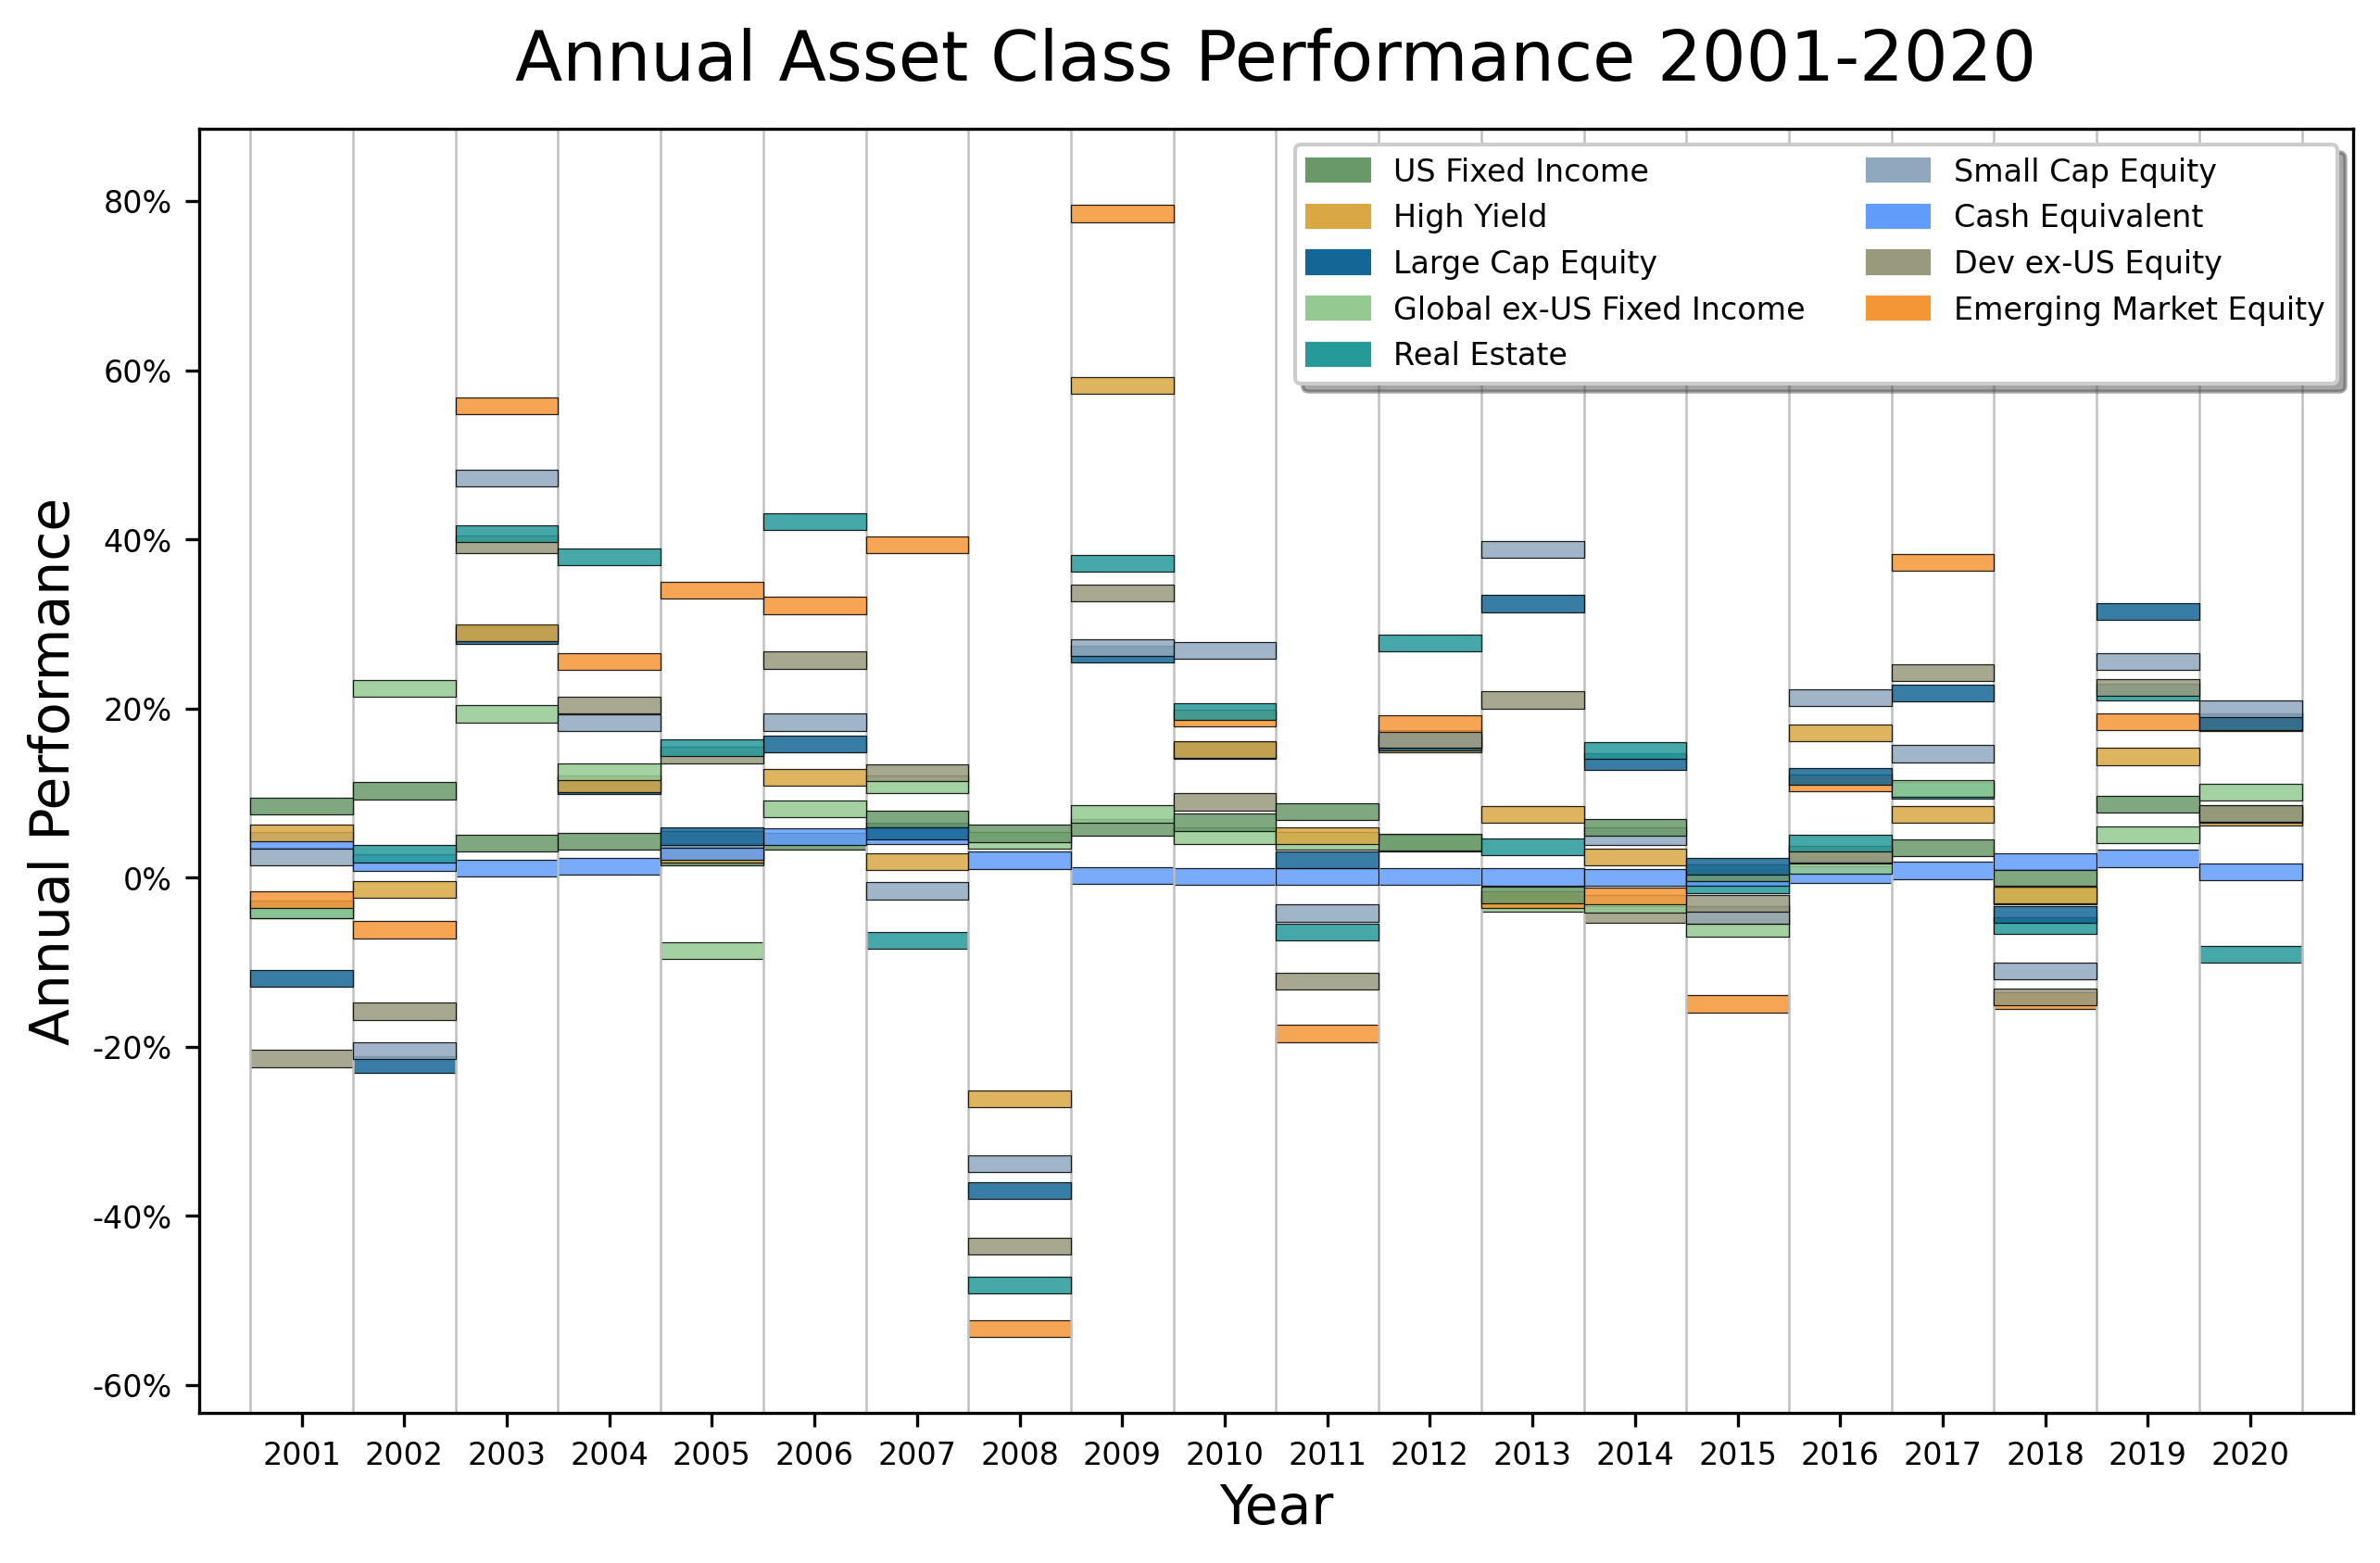

In [8]:
# create plot
fig, ax = plt.subplots()

# set plot limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([df_cal_ret.min().min() - 10, df_cal_ret.max().max() + 10])

# add vertical lines
for y_val in np.arange(2000.5, 2021.5, 1):
    plt.axvline(x=y_val, lw=0.6, color='silver', zorder=0)
    

# set parameters for rectangles
alpha = .85
height = 2
edgecolor = 'black'
linewidth = 0.3

# iterate through table values and call function to draw rectangles
# sort each year so that rectangles are drawn from lowest performer to highest

# iterate through each year in index
for year in df_cal_ret.index:
    # create temporary series for given year, sorted in ascending order by performance
    temp = df_cal_ret.loc[year].sort_values()
    # go through each class in ascending order
    for c in range(len(temp)):
        # extract performance of class 'c' in year
        val = temp[c]
        # set z-order so that lower performers are underneath higher performers
        z_order = c * 10
        # draw rectangle with call to function
        draw_box(year, val, height, colors[temp.index[c]], edgecolor, linewidth, alpha, z_order)
        
        # add label to max and min
        if min_max:
            if val == df_cal_ret.max(axis=1)[year]:
                ax.text(x=year, y=val+2, s=abbrevs[temp.index[c]], ha='center', fontsize=5)
            if val == df_cal_ret.min(axis=1)[year]:
                ax.text(x=year, y=val-4, s=abbrevs[temp.index[c]], ha='center', fontsize=5)

# plot with custom line colors
if mini_lines:
    for c in df_cal_ret.columns:
        plt.plot(df[c], color=colors[c], linewidth=mini_line_weight)
        
# draw legend
plt.legend(handles=legend, ncol=2, loc=1)

# set axis ticks
plt.xticks(df_cal_ret.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))

# label axes and title
plt.xlabel('Year')
plt.ylabel('Annual Performance')
plt.title('Annual Asset Class Performance 2001-2020', y=1.02)

# display plot        
plt.show()

line_name = '_lines' if mini_lines else ''
minmax_name = '_minmax' if min_max else ''
ax.figure.savefig(f"./images/callan_chart{line_name}{minmax_name}.png")

***

## Annual growth
Same information as above, but with lines instead of rectangles

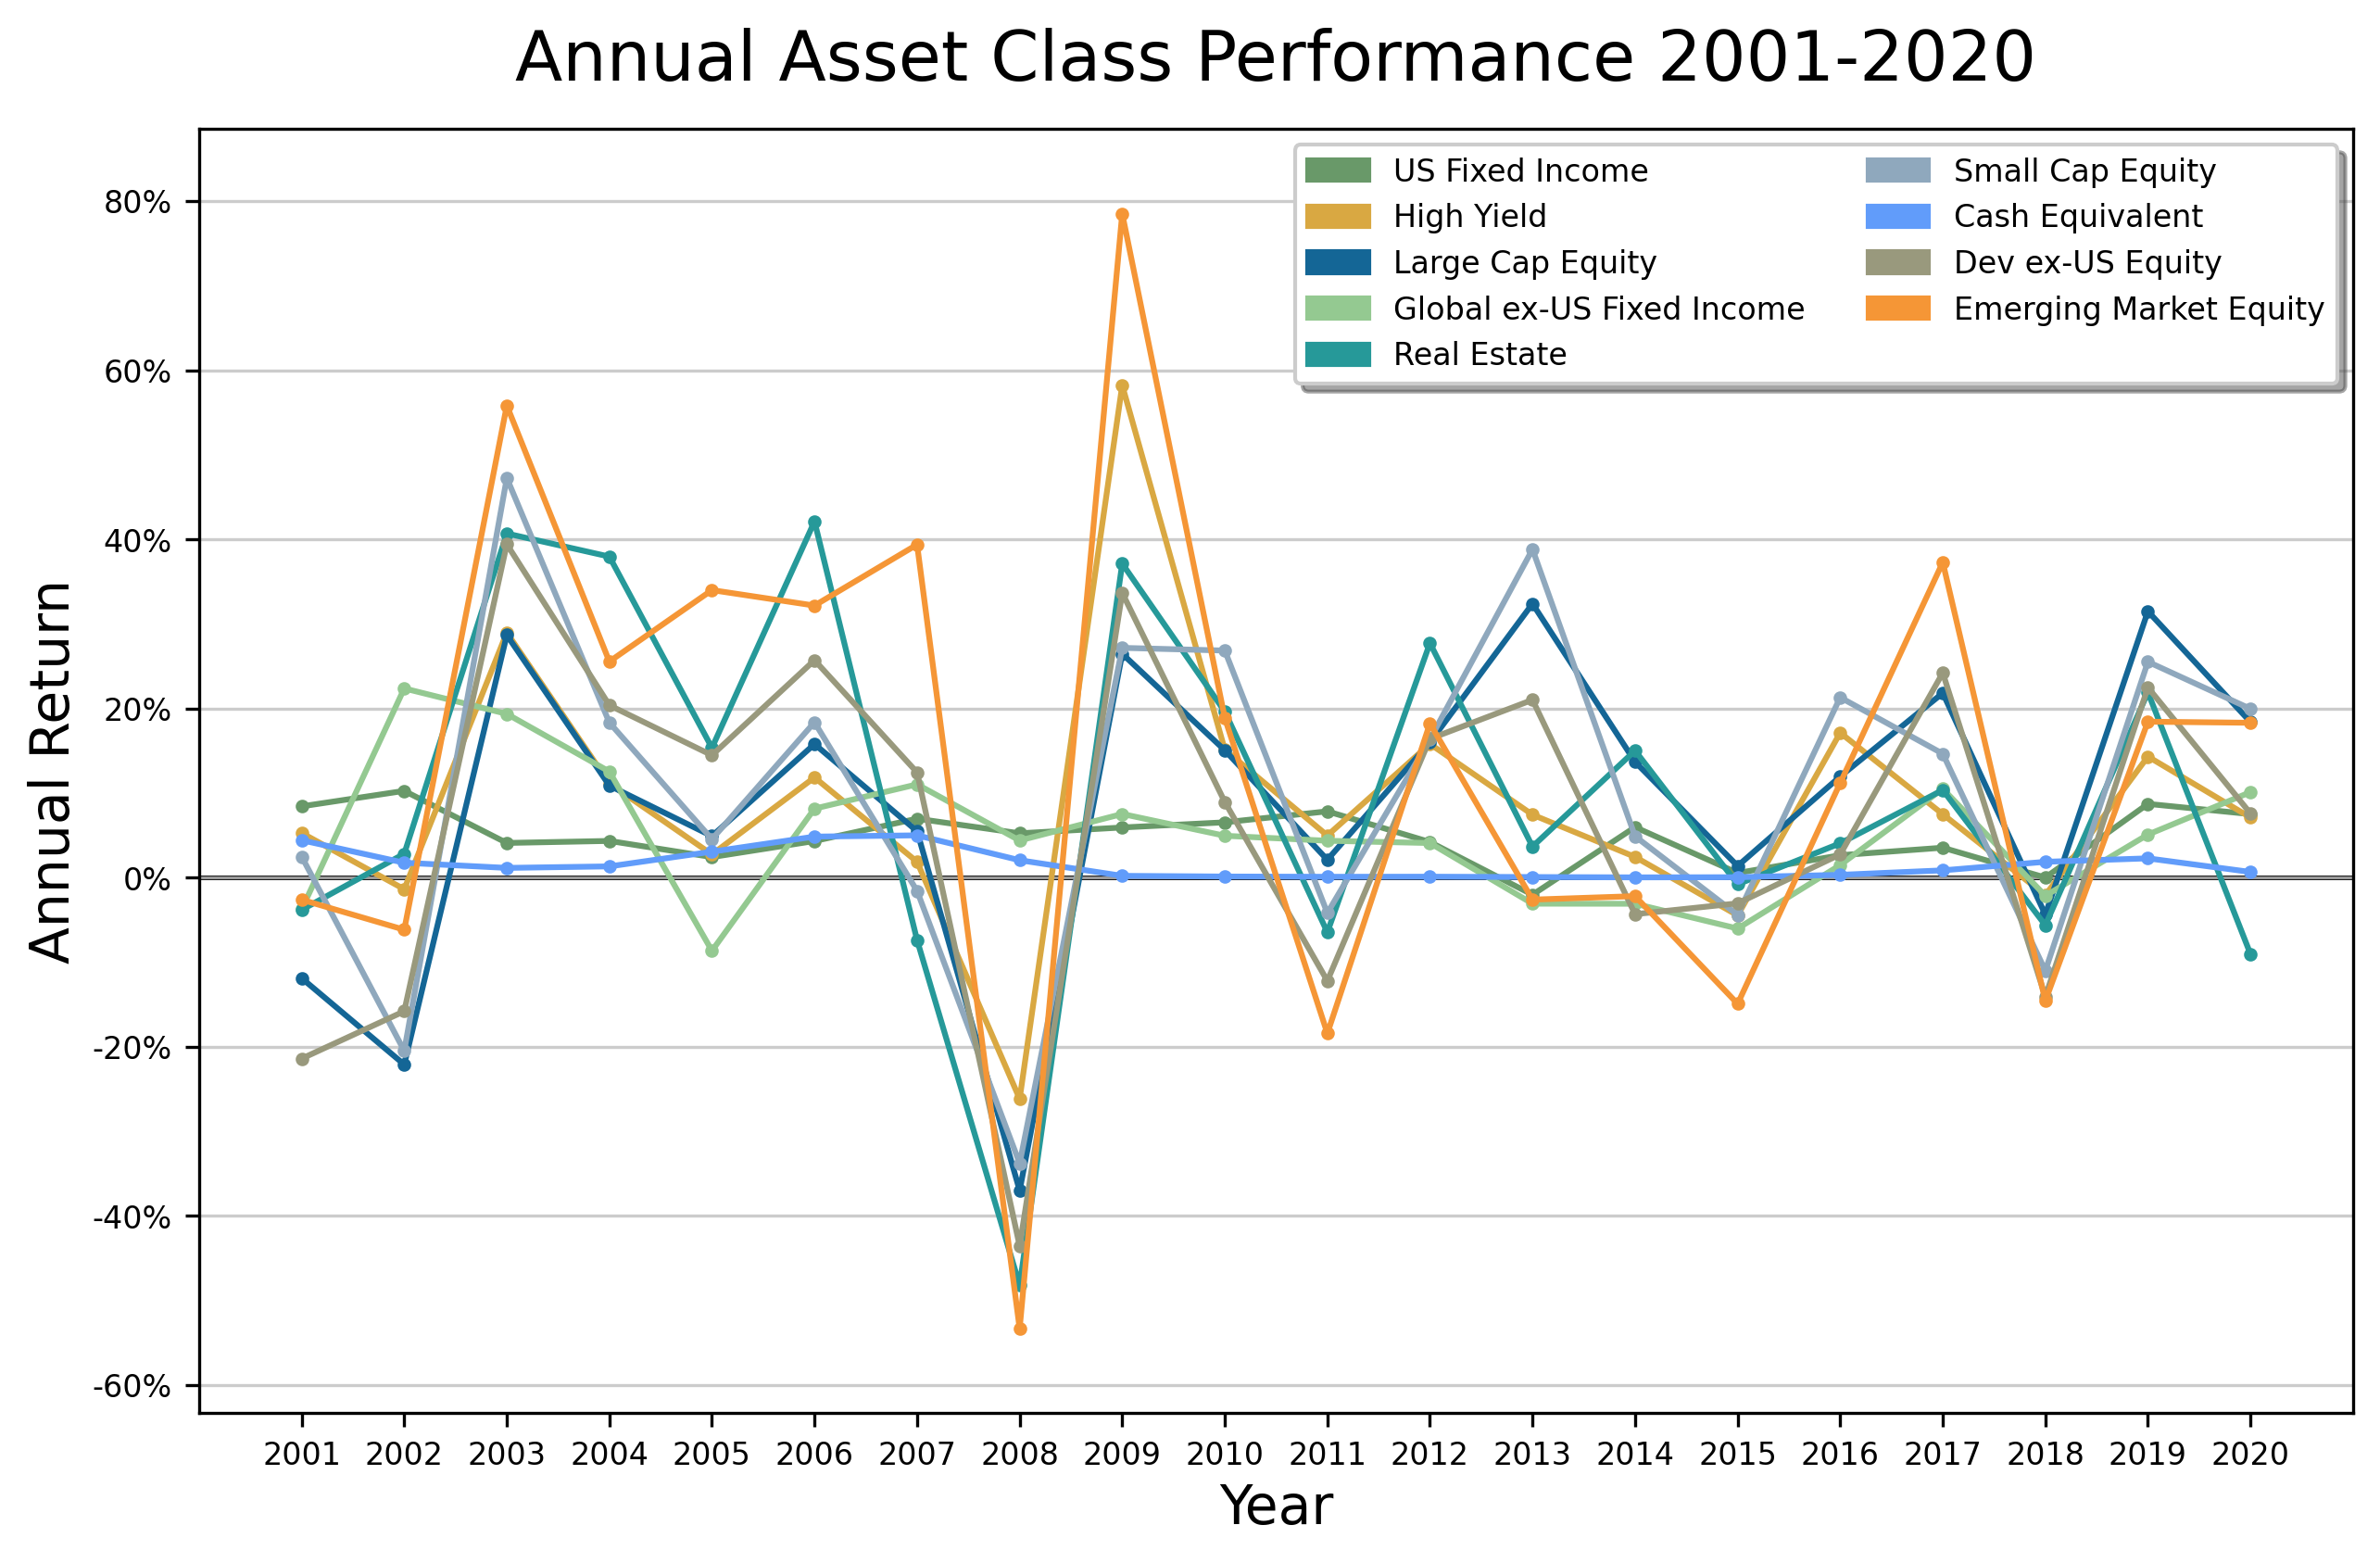

In [9]:
# create plot
fig, ax = plt.subplots()

# set plot limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([df_cal_ret.min().min() - 10, df_cal_ret.max().max() + 10])

# plot with custom line colors
for c in df_cal_ret.columns:
    plt.plot(df_cal_ret[c], color=colors[c], marker='o')

# add horizontal grid lines
plt.grid(axis='y', zorder=0)

# highlight y = zero 
zeroline()

# draw legend
plt.legend(handles=legend, ncol=2, loc=1)

# set axis ticks
ax.set_xticks(df_cal_ret.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))

# label axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Annual Return')
plt.title('Annual Asset Class Performance 2001-2020', y=1.02)

# display plot        
plt.show()

ax.figure.savefig("./images/annual_returns.png")


***

## Hypothetical growth of 10,000 dollars since end of 2000 

In [10]:
# create subframe of CAGR for Callan classes
df_cal_hg = df_hyp_gro.loc[:,'US Fixed Income':'Emerging Market Equity']

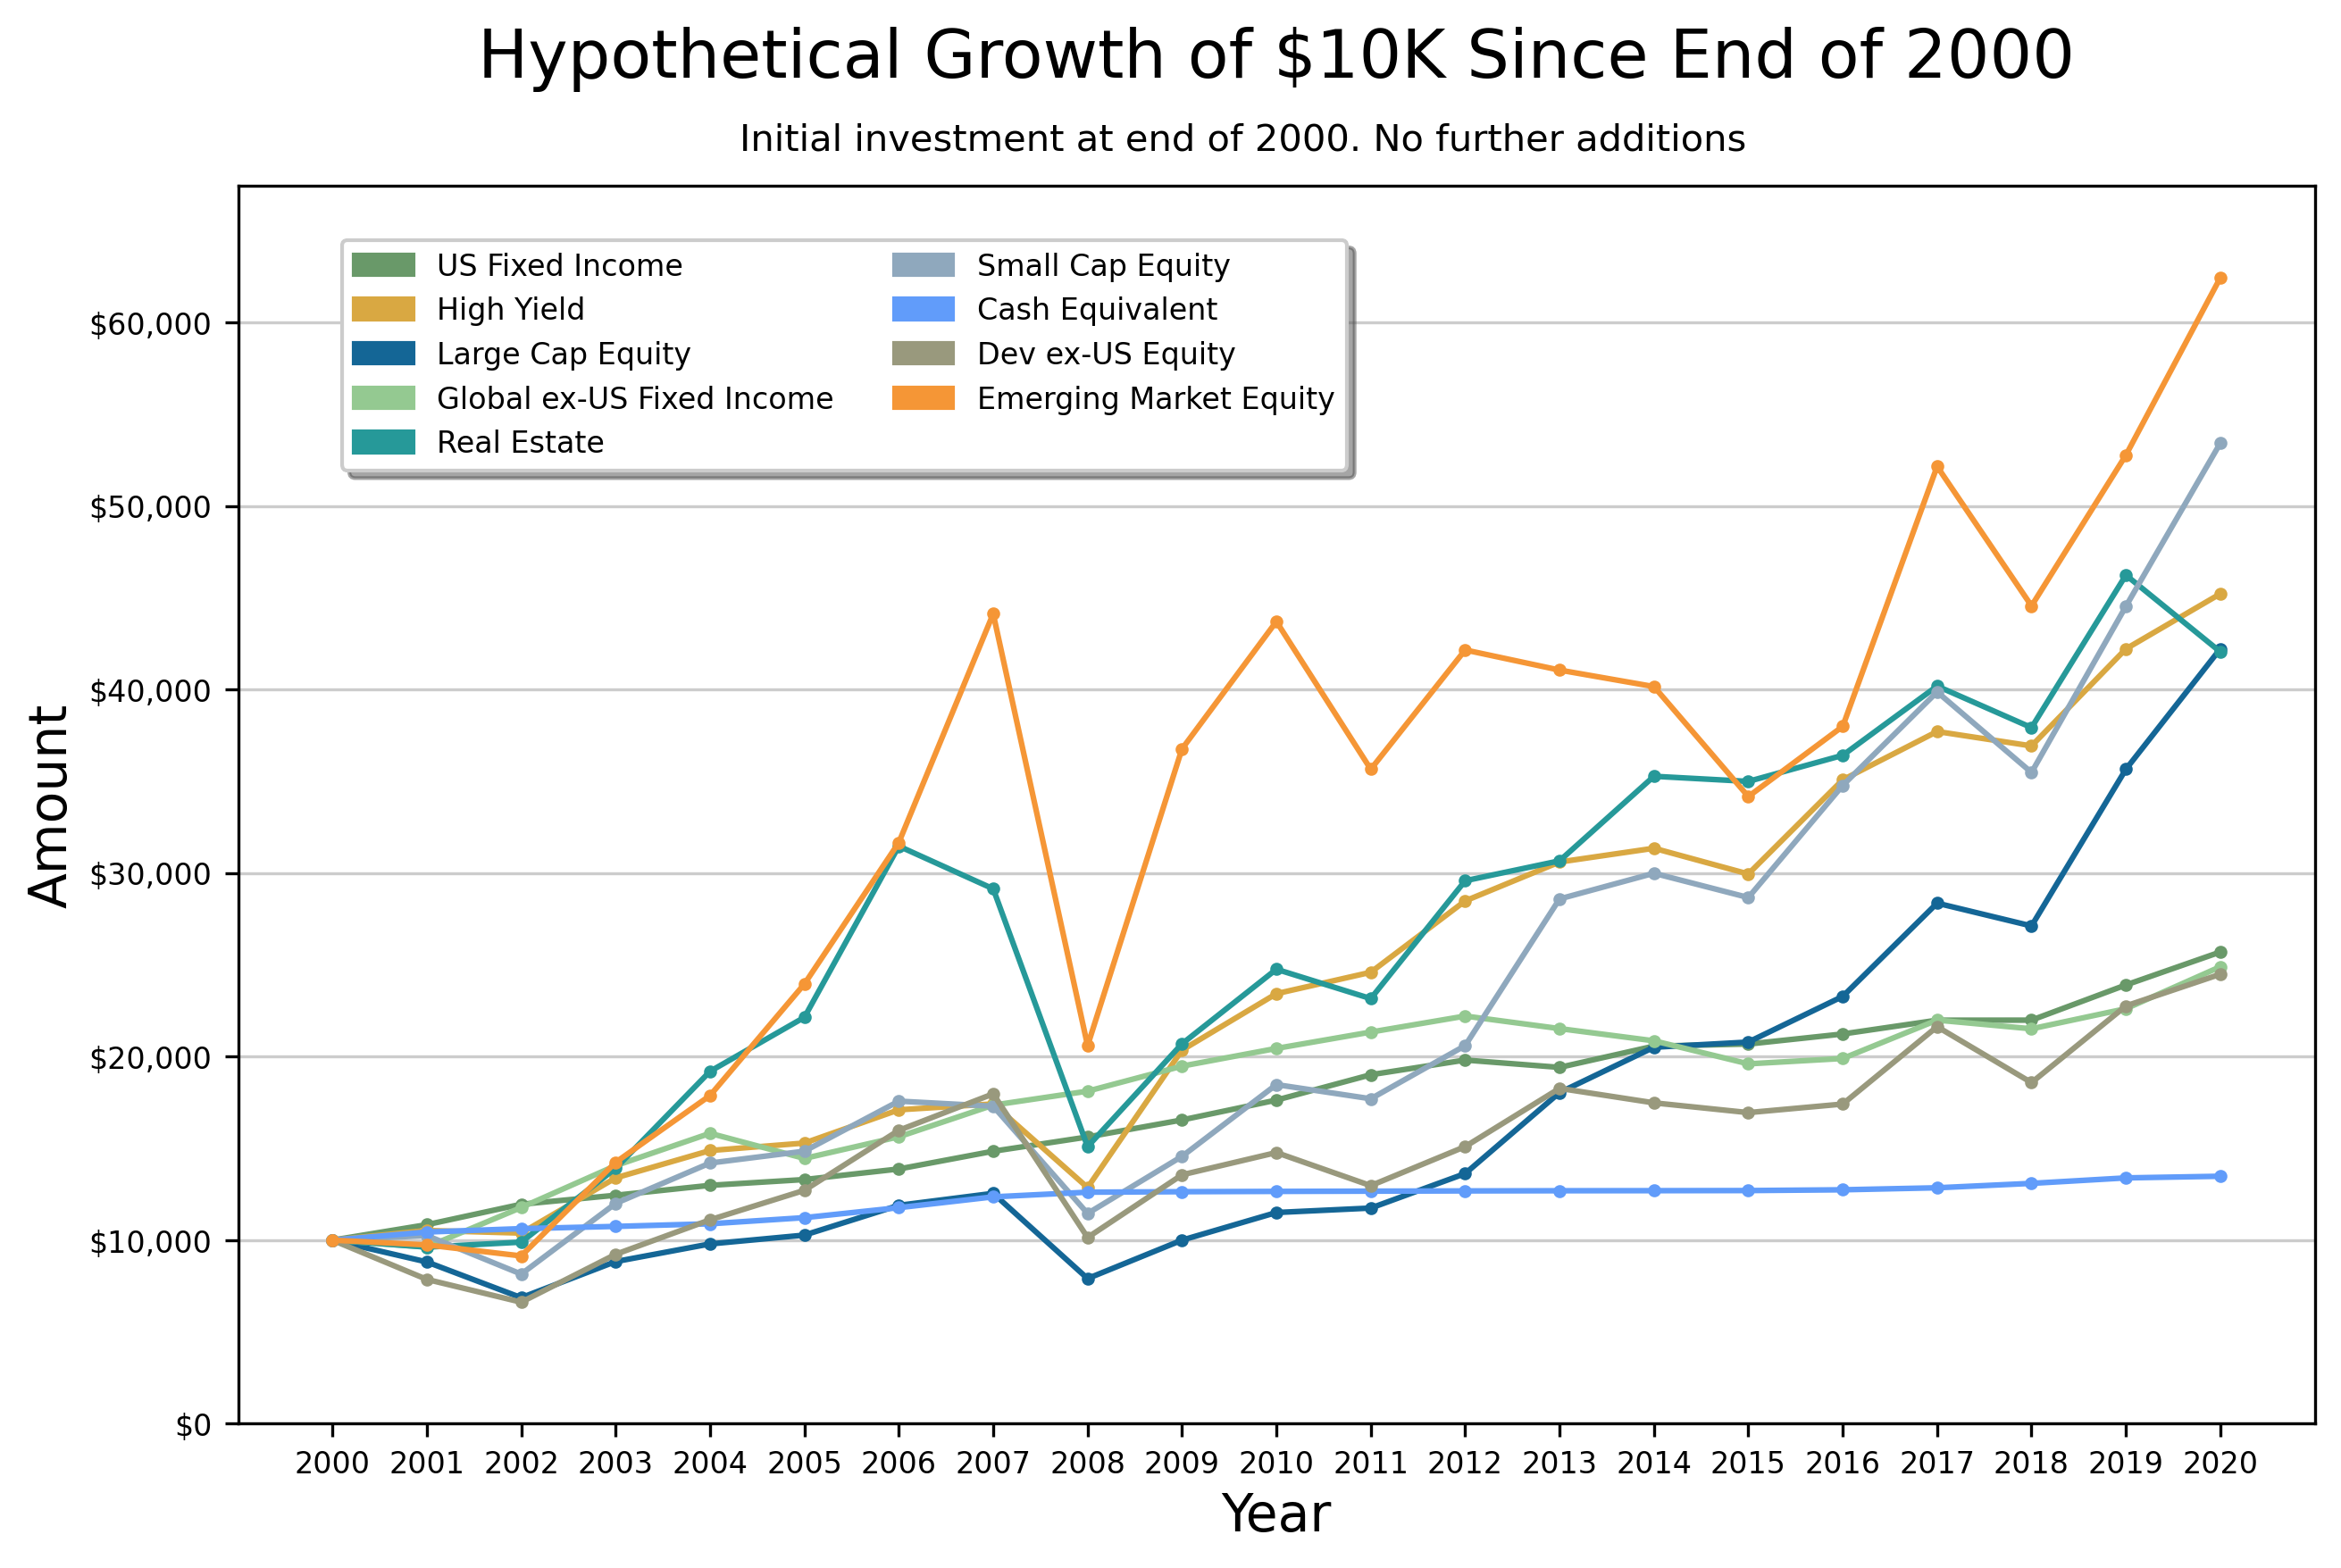

In [11]:
# create plot
fig, ax = plt.subplots()

# set plot limits
plt.xlim([x_min - 1, x_max])
plt.ylim([0, df_cal_hg.max().max() + 5000])

# plot with custom line colors
for c in df_cal_hg.columns:
    plt.plot(df_cal_hg[c], color=colors[c], marker='o')
    
# add horizontal grid lines
plt.grid(axis='y', zorder=0)

# draw legend
plt.legend(handles=legend, ncol=2, loc=(0.05, .77))

# set axis ticks
ax.set_xticks(df_cal_hg.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# label axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
plt.title('Hypothetical Growth of $10K Since End of 2000', y=1.07)
plt.suptitle('Initial investment at end of 2000. No further additions', fontsize=10, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_hyp_growth.png")

***

## Compound annual growth rate (CAGR)

In [12]:
# create subframe of CAGR for Callan classes
df_cal_cagr = df_cagr.loc[:,'US Fixed Income':'Emerging Market Equity']

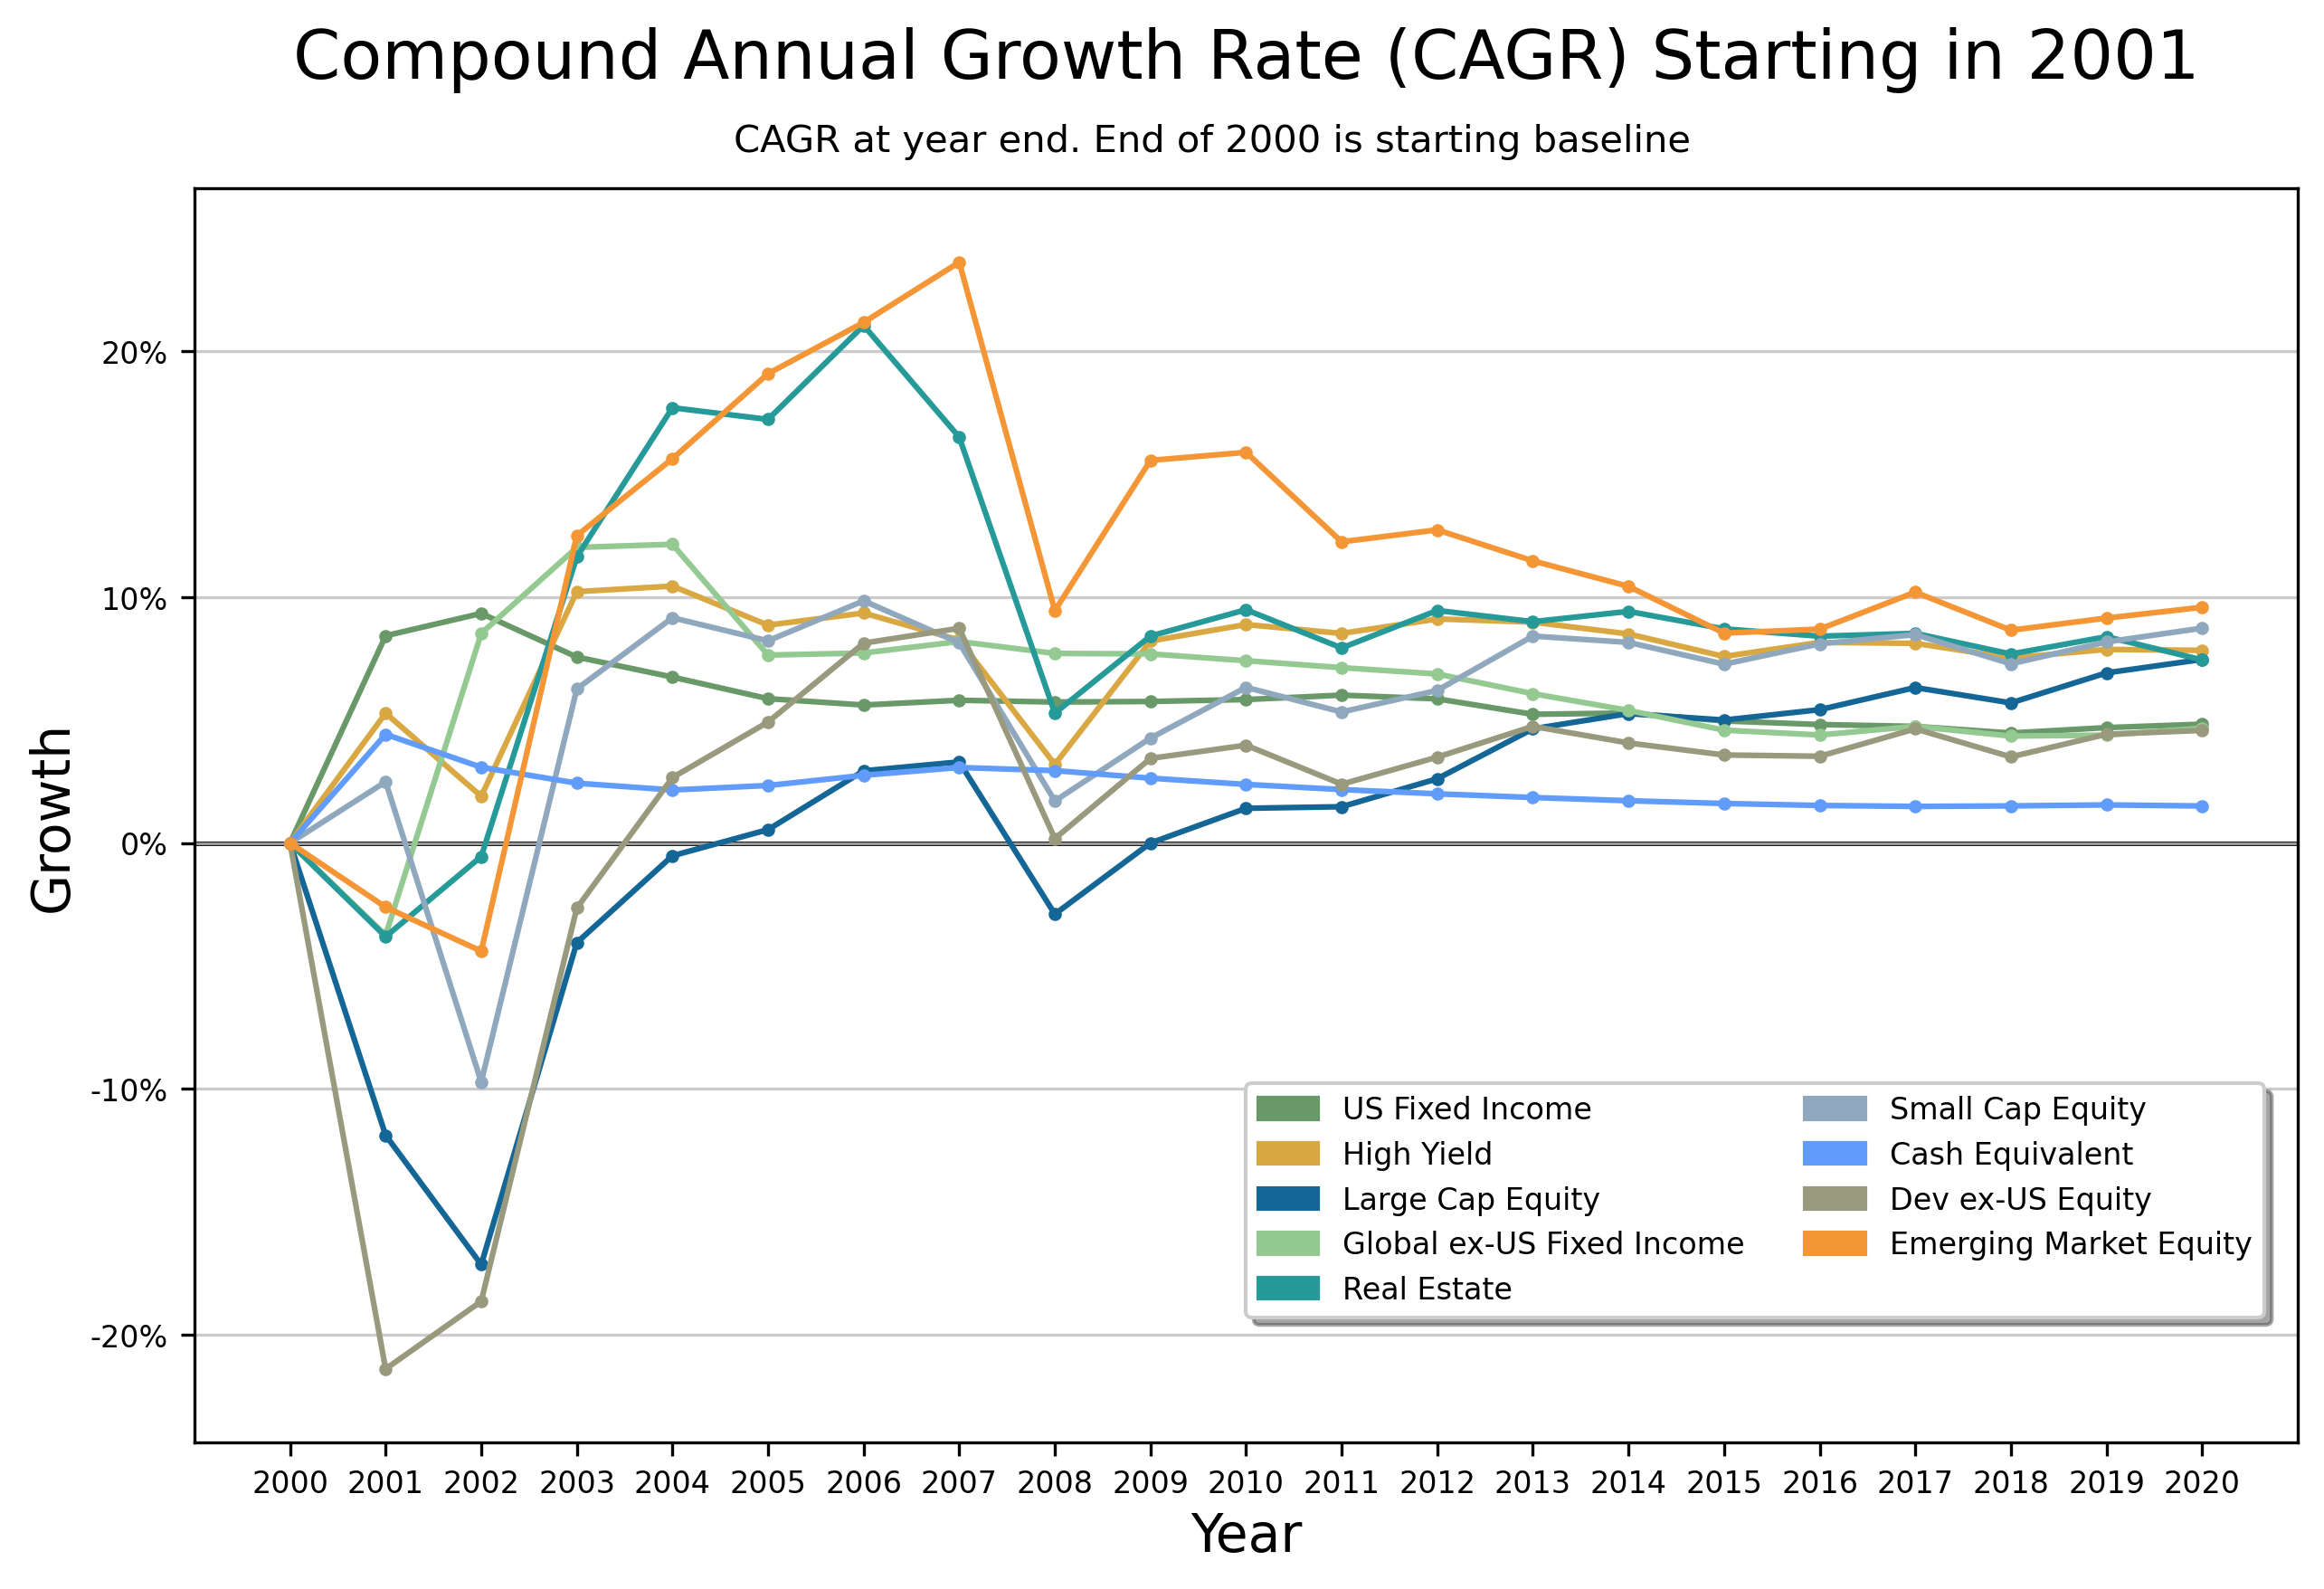

In [13]:
# create plot
fig, ax = plt.subplots()

# set plot limits
ax.set_xlim([x_min - 1, x_max])
ax.set_ylim([df_cal_cagr.min().min() - 3, df_cal_cagr.max().max() + 3])

# plot with custom line colors
for c in df_cal_cagr.columns:
    plt.plot(df_cal_cagr[c], color=colors[c], marker='o')

# add horizontal grid lines
plt.grid(axis='y', zorder=0)

# highlight y = zero 
zeroline()
    
# draw legend
plt.legend(handles=legend, ncol=2, loc=(0.5, 0.1))

# set axis ticks
ax.set_xticks(df_cal_cagr.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))

# label axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Growth')
plt.title('Compound Annual Growth Rate (CAGR) Starting in 2001', y=1.07)
plt.suptitle('CAGR at year end. End of 2000 is starting baseline', fontsize=10, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_cagr.png")

***

## Comparison to Boglehead 3-Fund

### Hypothetical Growth of 10,000 dollars

In [14]:
# create new legend with Boglhead 3-Fund
from matplotlib.lines import Line2D

legend2 = legend.copy()
legend2.append(Line2D([0], [0], color='deepskyblue', lw=3, label='3-Fund 60% Equity, 40% Fixed'))
legend2.append(Line2D([0], [0], color='darkviolet', lw=3, label='3-Fund 40% Equity, 60% Fixed'))

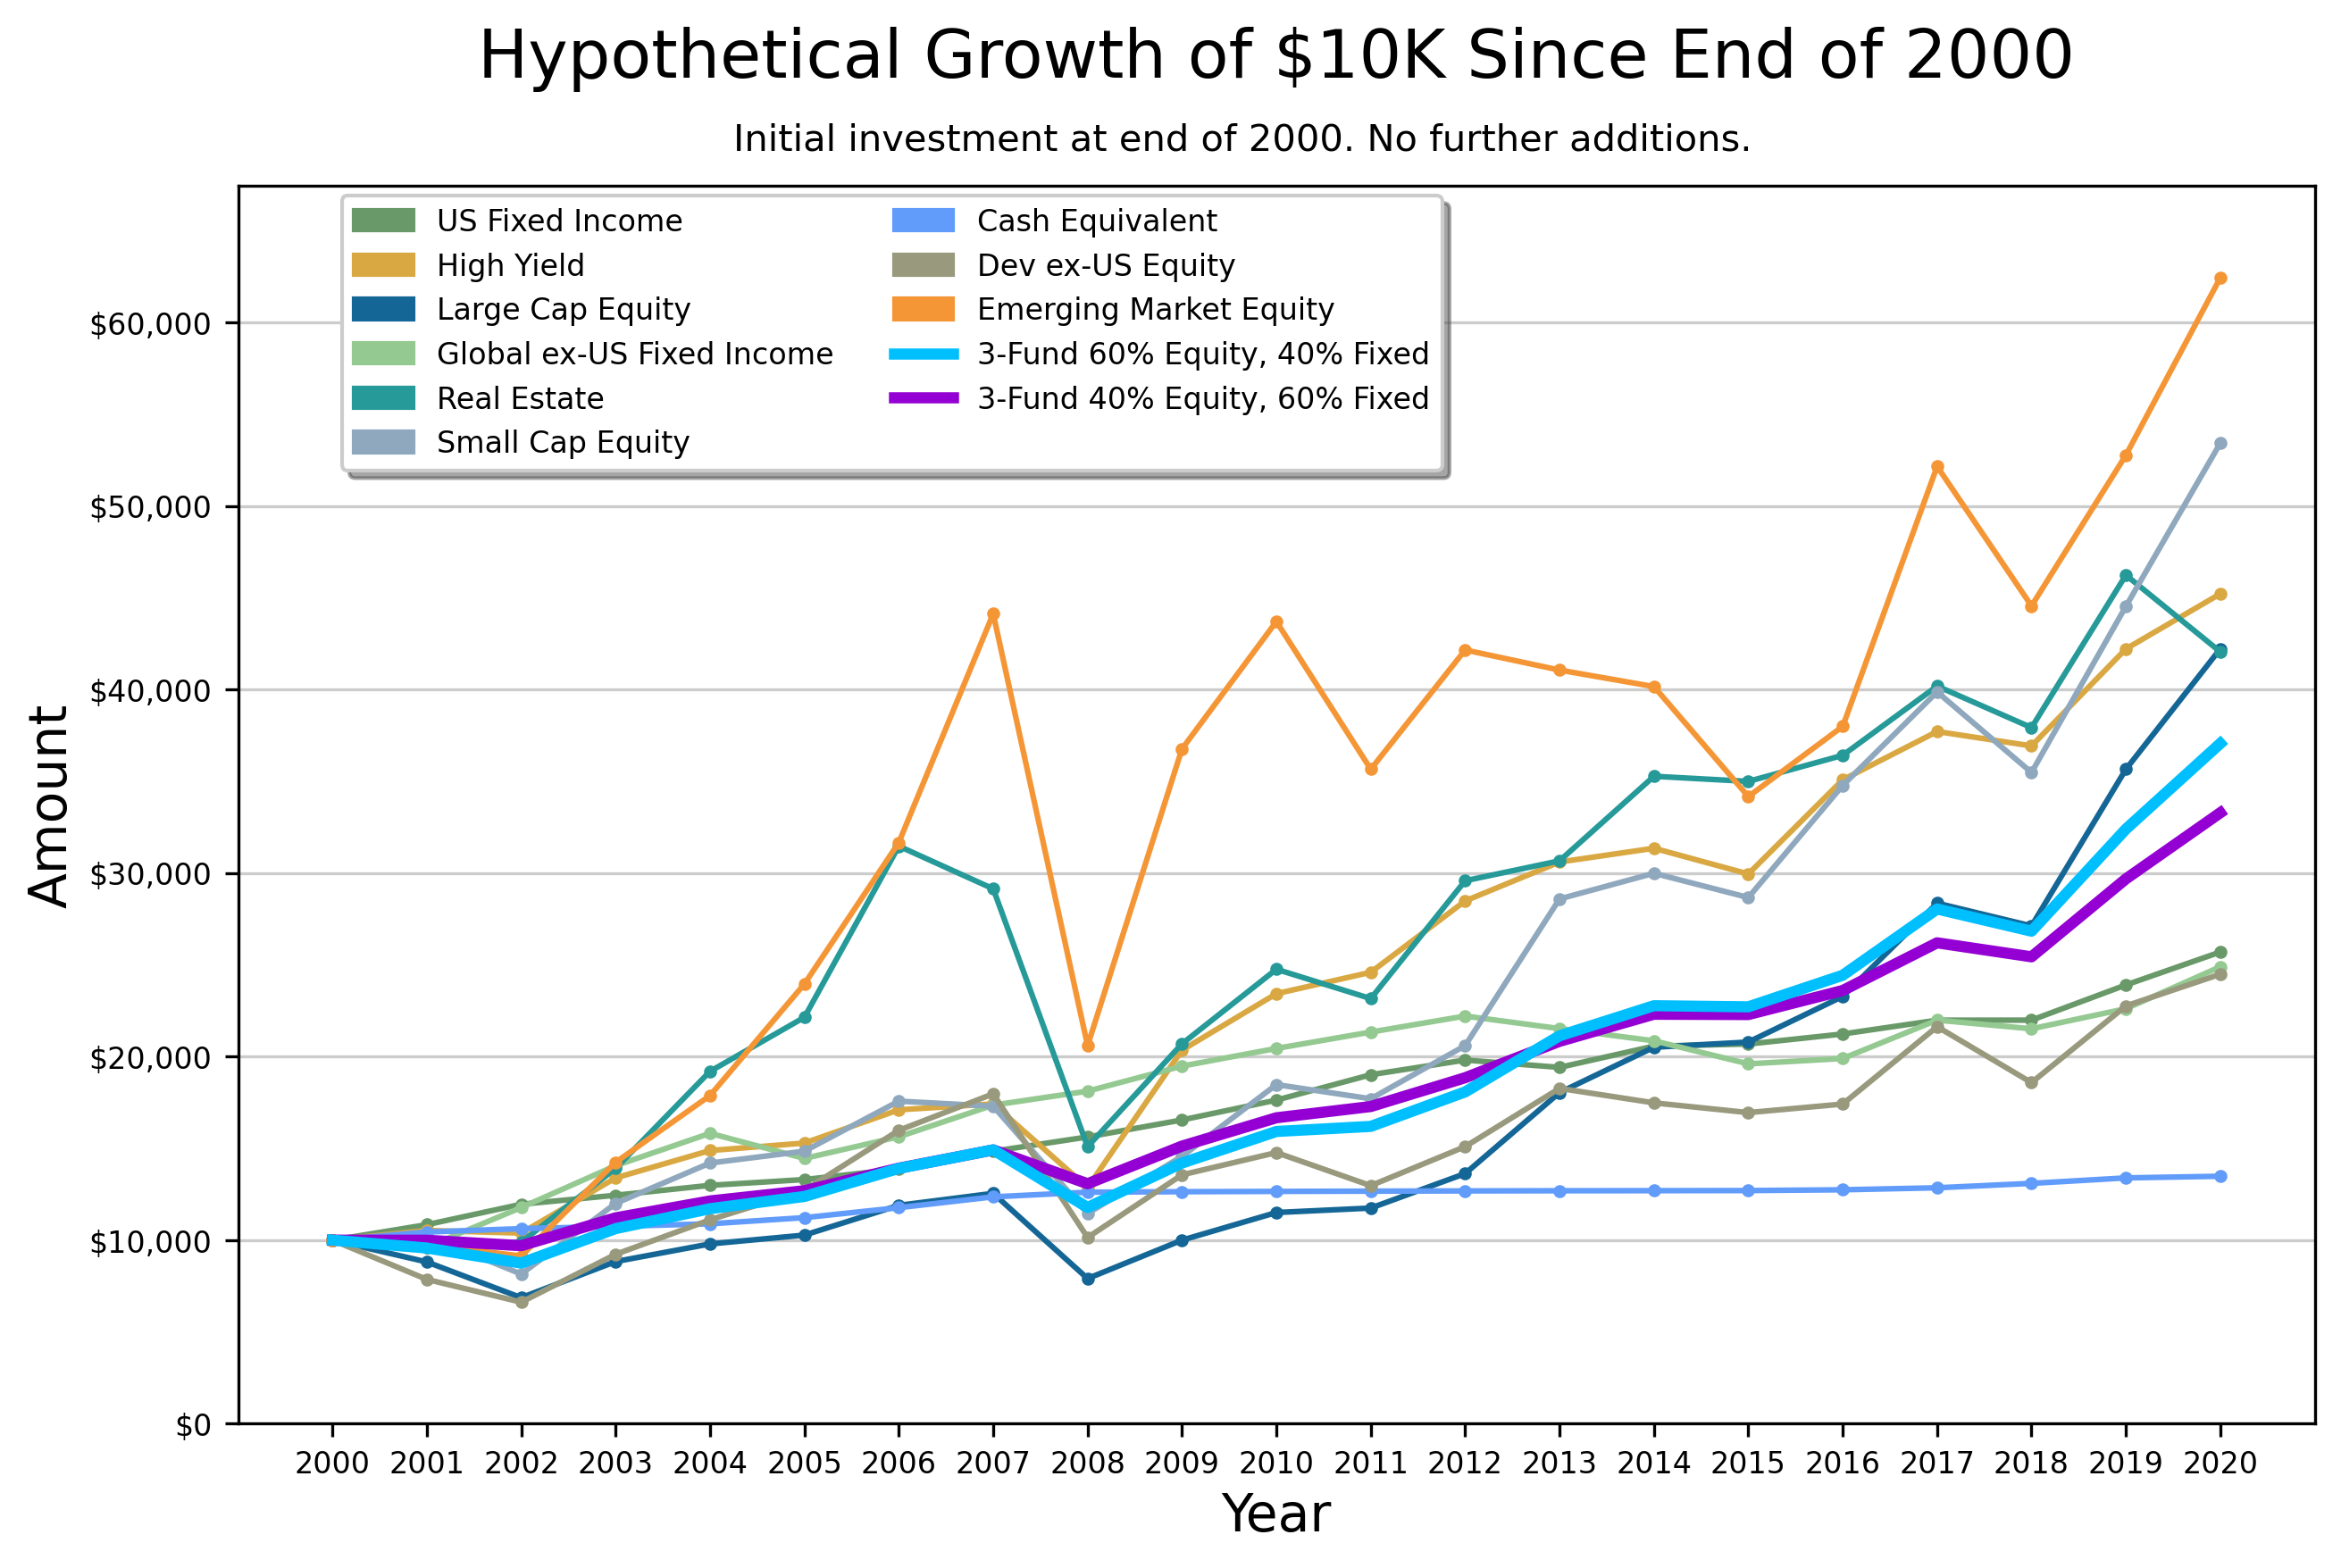

In [17]:
# create plot
fig, ax = plt.subplots()

# set plot limits
plt.xlim([x_min - 1, x_max])
plt.ylim([0, df_cal_hg.max().max() + 5000])

# plot with custom line colors
for c in df_cal_hg.columns:
    plt.plot(df_cal_hg[c], color=colors[c], marker='o')
    
# add equal 3 funds
plt.plot(df_hyp_gro['3-Fund 60F/40E'], color='darkviolet', lw=3)
plt.plot(df_hyp_gro['3-Fund 40F/60E'], color='deepskyblue', lw=3)
    
# add horizontal grid lines
plt.grid(axis='y', zorder=0)

# draw legend
plt.legend(handles=legend2, ncol=2, loc=(0.05, .77))

# set axis ticks
ax.set_xticks(df_cal_hg.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# label axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
plt.title('Hypothetical Growth of $10K Since End of 2000', y=1.07)
plt.suptitle('Initial investment at end of 2000. No further additions.', fontsize=10, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_hyp_growth_bogle.png")

### Compound Annual Growth Rate

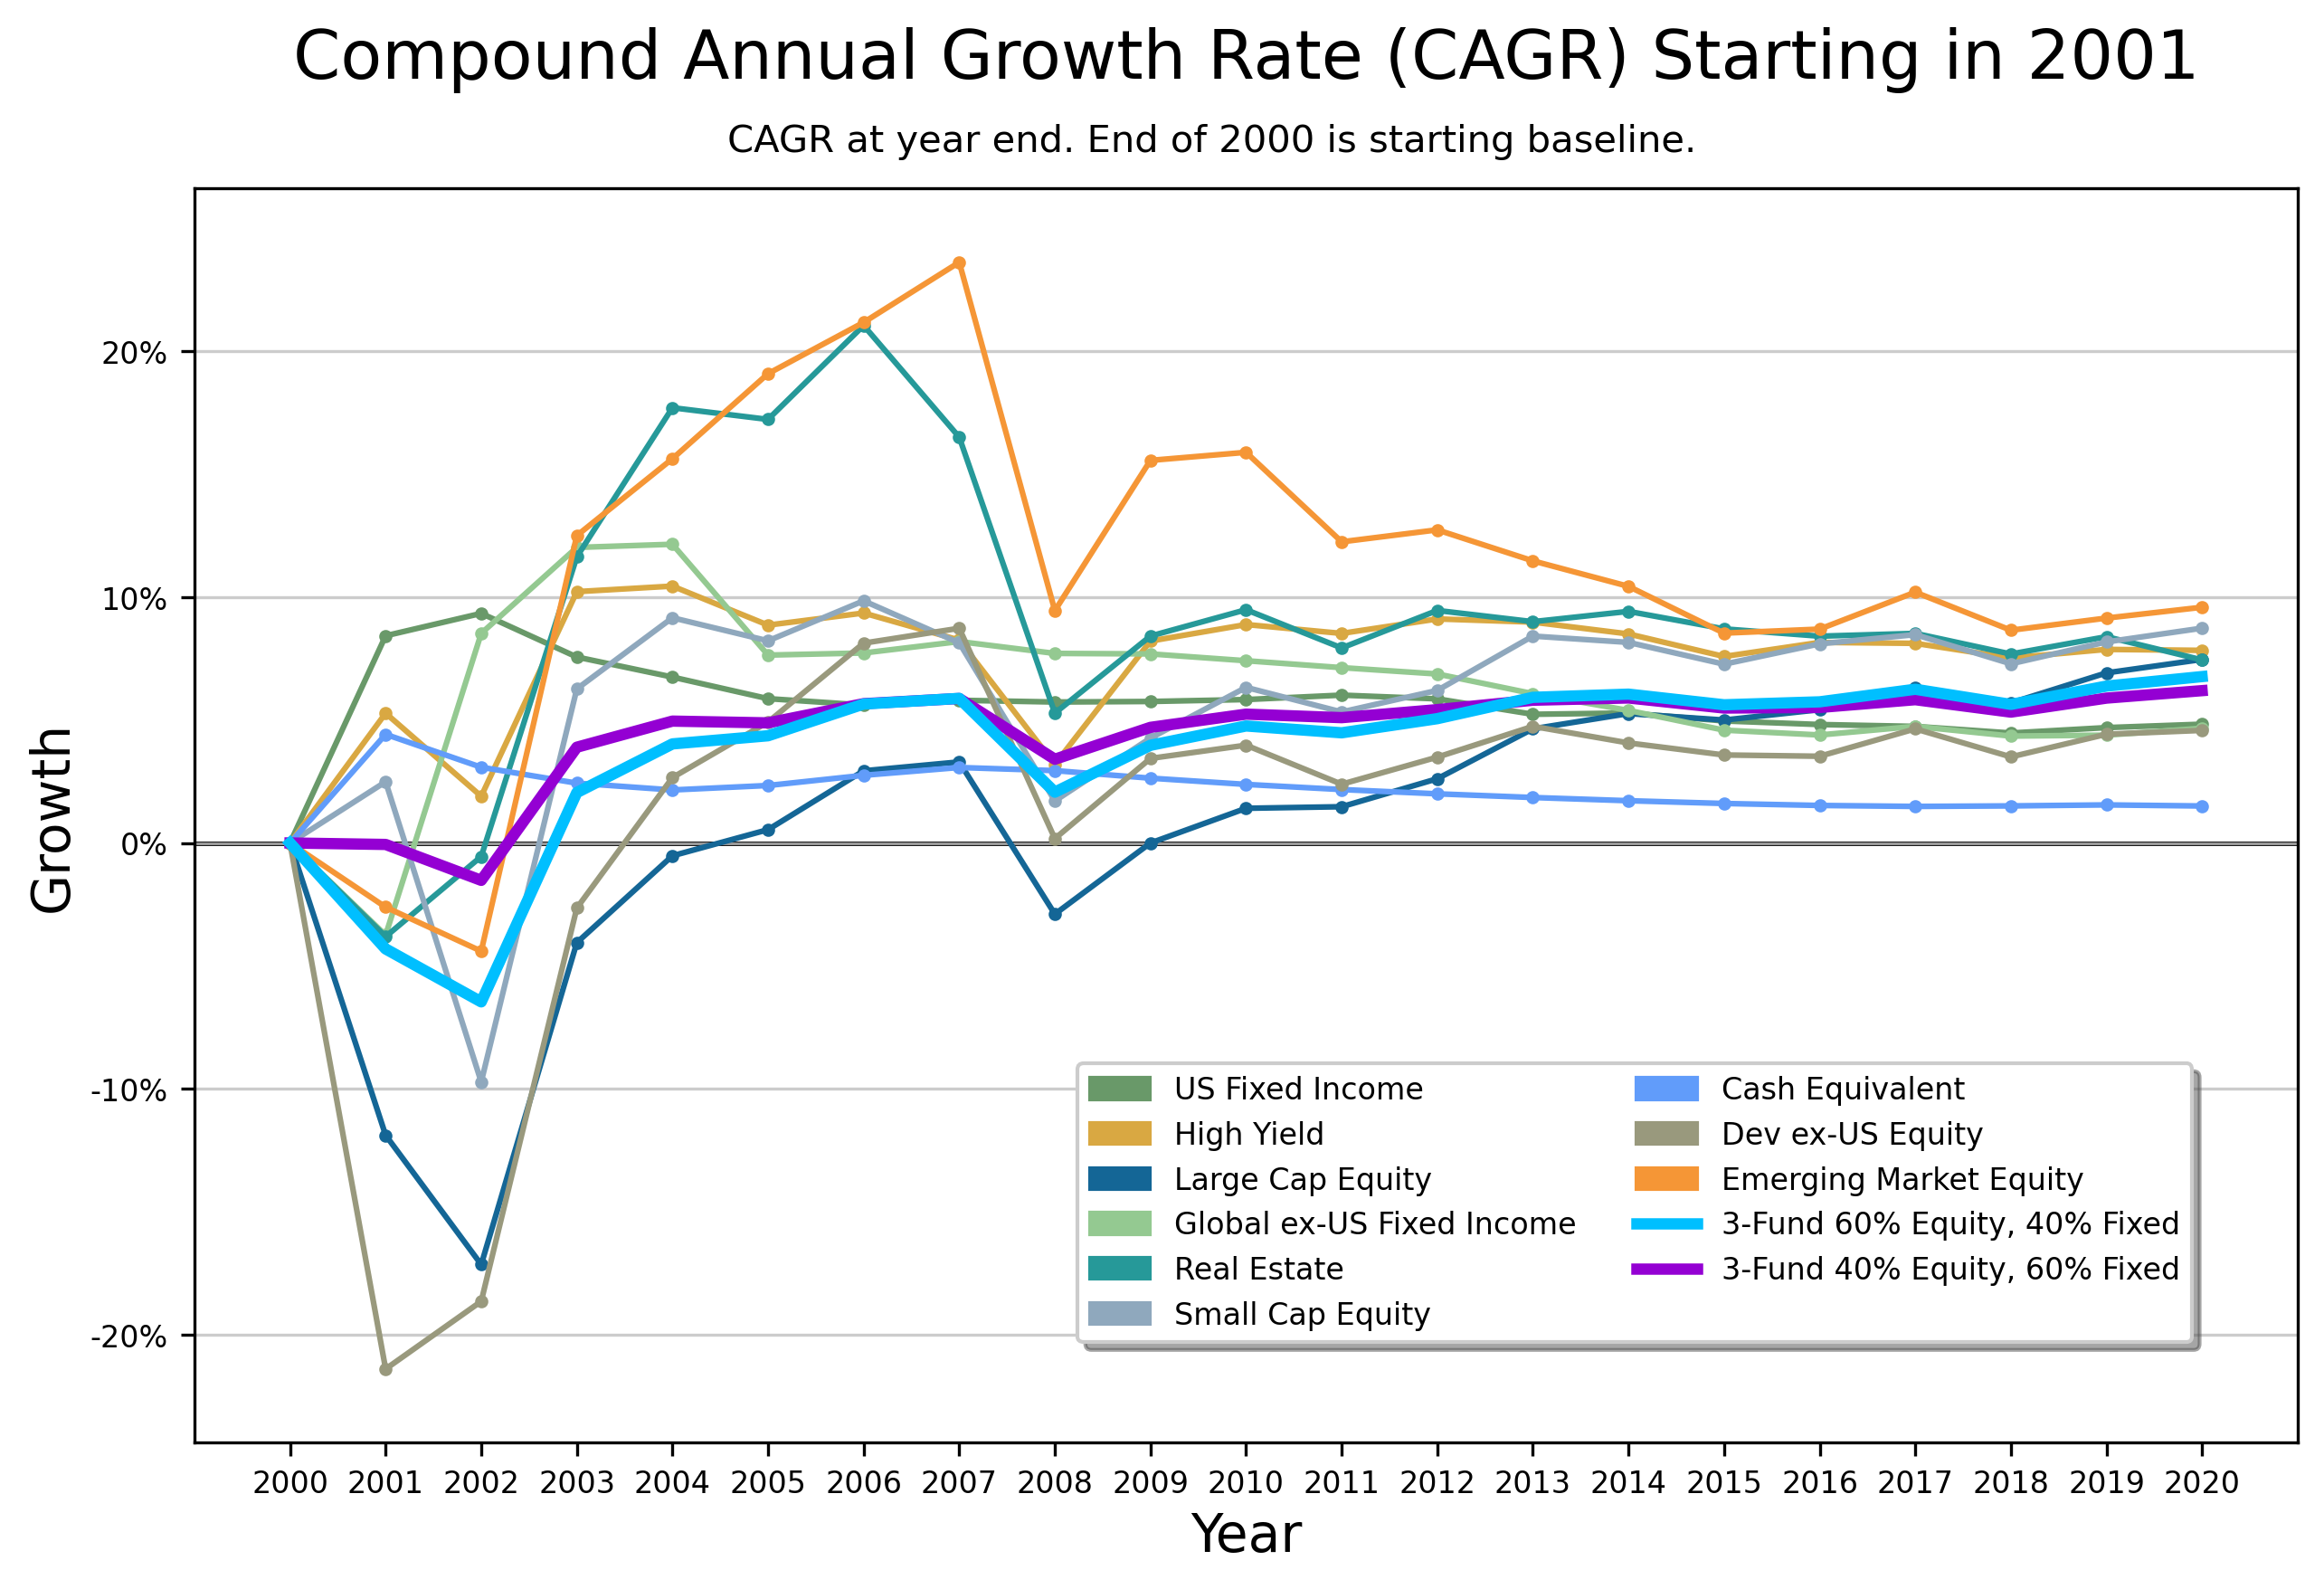

In [18]:
# create plot
fig, ax = plt.subplots()

# set plot limits
ax.set_xlim([x_min - 1, x_max])
ax.set_ylim([df_cal_cagr.min().min() - 3, df_cal_cagr.max().max() + 3])

# plot with custom line colors
for c in df_cal_cagr.columns:
    plt.plot(df_cal_cagr[c], color=colors[c], marker='o')
    
# add equal 3 funds
plt.plot(df_cagr['3-Fund 60F/40E'], color='darkviolet', lw=3)
plt.plot(df_cagr['3-Fund 40F/60E'], color='deepskyblue', lw=3)

# add horizontal grid lines
plt.grid(axis='y', zorder=0)

# highlight y = zero 
zeroline()
    
# draw legend
plt.legend(handles=legend2, ncol=2, loc=(0.42, 0.08))

# set axis ticks
ax.set_xticks(df_cal_cagr.index)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))

# label axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Growth')
plt.title('Compound Annual Growth Rate (CAGR) Starting in 2001', y=1.07)
plt.suptitle('CAGR at year end. End of 2000 is starting baseline.', fontsize=10, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_cagr_bogle.png")